# Autoencodeur 

Objectif : construire un autoencodeur à deux couches en utilisant Keras :
- l'encodeur compresse l'information dans l'espace latent
- le décodeur reconstruit l'image

## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)

In [75]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import  Input,Conv2D,MaxPool2D,Dense,BatchNormalization,LeakyReLU,Flatten, Reshape,Conv2DTranspose,Activation, Dropout
from tensorflow.keras.optimizers import Adam


On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [76]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)


# normalisation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

dim_latent = 128
batch_size=256



## Autoencodeur à couches convolutives


In [89]:
class Autoencoder(tk.Model):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder=Sequential([Conv2D(filters=32,kernel_size=3,padding='same'),
                                 BatchNormalization(),
                                 LeakyReLU(),
                                 MaxPool2D(pool_size=2,strides=2),
                                 Conv2D(filters=64,kernel_size=3,padding='same'),
                                 BatchNormalization(),
                                 LeakyReLU(),
                                 MaxPool2D(pool_size=2,strides=2),
                                 Flatten()
                                ])
        self.latent=Sequential([Dense(units=256,name='latent',activation='sigmoid'),
                               ])

        self.decoder=Sequential([Dense(units=3136),
                                 LeakyReLU(),
                                 Reshape((7,7,-1)),
                                 Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding='same'),
                                 BatchNormalization(),
                                 LeakyReLU(),
                                 Conv2DTranspose(filters=1,kernel_size=3,strides=2,padding='same'),
                                 BatchNormalization(),
                                 Activation('sigmoid')
                                ])
    def call(self,inputs):
        encoder=self.encoder(inputs)
        code=self.latent(encoder)
        return self.decoder(code)




#model=Sequential([Input(shape=(28,28,1)),encoder,code,decoder])
inputs=Input(shape=(28,28,1))
#input1=encoder(inputs)
#input2=code(input1)
#output=decoder(input2)
output=Autoencoder()(inputs)
# output=model(inputs)
model=Model(inputs=inputs,outputs=output)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 autoencoder_11 (Autoencode  (None, 28, 28, 1)         1665989   
 r)                                                              
                                                                 
Total params: 1665989 (6.36 MB)
Trainable params: 1665667 (6.35 MB)
Non-trainable params: 322 (1.26 KB)
_________________________________________________________________


In [90]:
encoder=Sequential()
encoder.add(Input(shape=(28,28,1)))
encoder.add(Conv2D(filters=32,kernel_size=3,padding='same'))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(MaxPool2D(pool_size=2,strides=2))

encoder.add(Conv2D(filters=64,kernel_size=3,padding='same'))
encoder.add(BatchNormalization())
encoder.add(LeakyReLU())
encoder.add(MaxPool2D(pool_size=2,strides=2))
encoder.add(Flatten()) # Last encoding layer

# Latent or Code layer
code=Sequential()
code.add(Dense(input_dim=3136,units=128,name='latent',activation='sigmoid'))

# Decodeur
decoder=Sequential()
decoder.add(Dense(input_dim=128,units=3136))
decoder.add(LeakyReLU())
decoder.add(Reshape((7,7,-1)))
decoder.add(Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding='same'))
decoder.add(BatchNormalization())
decoder.add(LeakyReLU())

decoder.add(Conv2DTranspose(filters=1,kernel_size=3,strides=2,padding='same'))
decoder.add(BatchNormalization())
decoder.add(Activation('sigmoid'))

# AE
#TODO

#encoder.summary()
#code.summary()
#decoder.summary()
#model=Sequential([Input(shape=(28,28,1)),encoder,code,decoder])
# inputs=Input(shape=(28,28,1))
# input1=encoder(inputs)
# input2=code(input1)
# output=decoder(input2)
# model=Model(inputs=inputs,outputs=output)
# model.summary()

In [91]:
model.compile(optimizer=Adam(1e-3), loss='mse',metrics=['acc'])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 autoencoder_11 (Autoencode  (None, 28, 28, 1)         1665989   
 r)                                                              
                                                                 
Total params: 1665989 (6.36 MB)
Trainable params: 1665667 (6.35 MB)
Non-trainable params: 322 (1.26 KB)
_________________________________________________________________


Epoch 1/7
235/235 [==============================] - 16s 65ms/step - loss: 0.1367 - acc: 0.7567 - val_loss: 0.1347 - val_acc: 0.8105
Epoch 2/7
234/235 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.8107
Epoch 0 Précision :0.811 
313/313 [==============================] - 1s 4ms/step


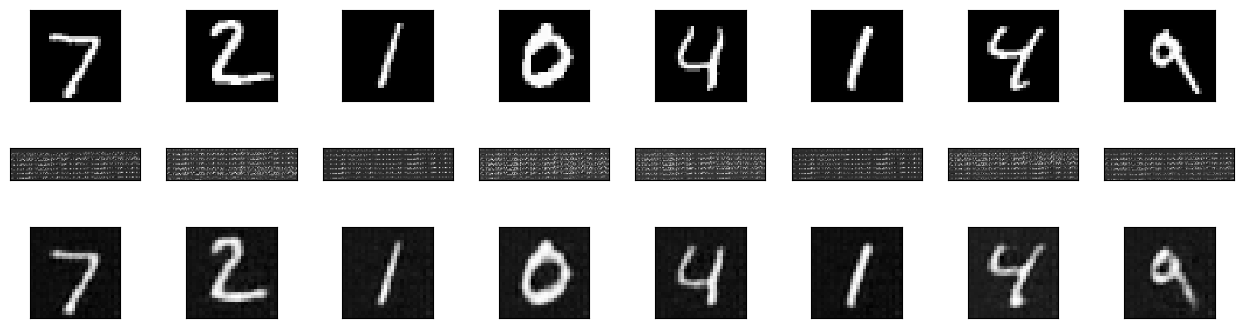

235/235 [==============================] - 17s 73ms/step - loss: 0.0817 - acc: 0.8107 - val_loss: 0.0681 - val_acc: 0.8138
Epoch 3/7
235/235 [==============================] - 15s 64ms/step - loss: 0.0566 - acc: 0.8142 - val_loss: 0.0449 - val_acc: 0.8137
Epoch 4/7
235/235 [==============================] - 15s 64ms/step - loss: 0.0410 - acc: 0.8149 - val_loss: 0.0354 - val_acc: 0.8140
Epoch 5/7
235/235 [==============================] - 16s 66ms/step - loss: 0.0308 - acc: 0.8152 - val_loss: 0.0259 - val_acc: 0.8141
Epoch 6/7
235/235 [==============================] - 16s 66ms/step - loss: 0.0239 - acc: 0.8153 - val_loss: 0.0187 - val_acc: 0.8143
Epoch 7/7
234/235 [============================>.] - ETA: 0s - loss: 0.0190 - acc: 0.8154
Epoch 5 Précision :0.815 
313/313 [==============================] - 1s 4ms/step


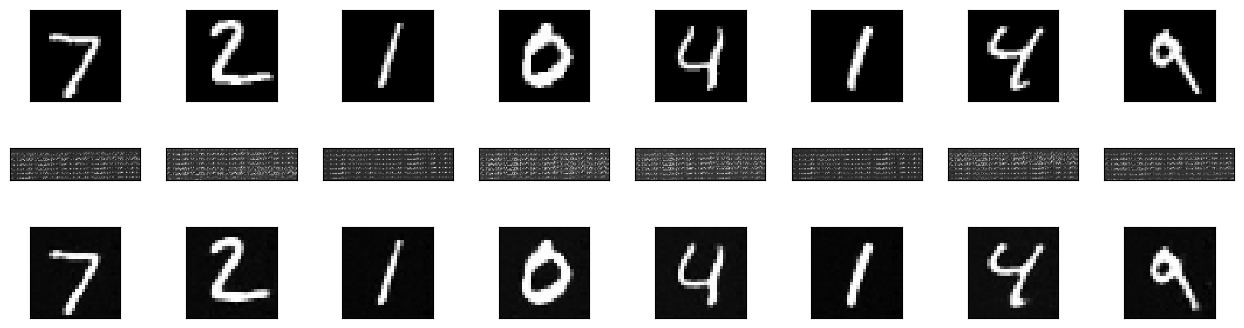

235/235 [==============================] - 17s 72ms/step - loss: 0.0190 - acc: 0.8153 - val_loss: 0.0144 - val_acc: 0.8144


In [92]:
class myCallback(tk.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((epoch-1) % 5==0):   
            print("\nEpoch {0:d} Précision :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            encoded_imgs = encoder.predict(x_test)
            decoded_imgs = model.predict(x_test)


            n = 8  
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(28,-1))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

            
callbacks = myCallback()
model.fit(x_train,x_train,epochs=7,batch_size=batch_size,validation_data=(x_test, x_test),callbacks=[callbacks])